In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
df.shape

(7043, 21)

In [5]:
pd.pandas.set_option('display.max_columns',None)

In [6]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
#CHECK THE descriptive statistics of numeric variables
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

#Seniorcitizen is actually categorical hence 25-50-75th % distribution is not proper
#75% customers have tenure less than 55months
#Average monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.95PER MONTH

Text(0.5, 1.02, 'Count of Target variable per category')

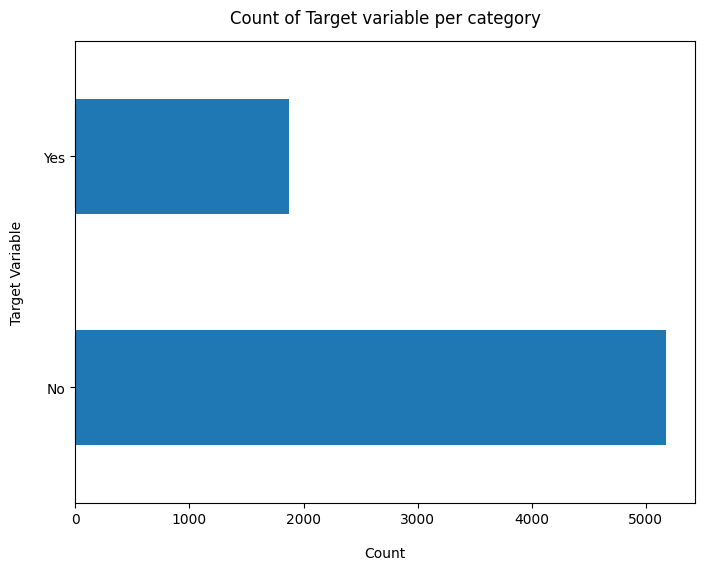

In [10]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of Target variable per category", y=1.02)

In [11]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

#Data is highly imbalanced
#so we analyse the data with other features while talking the target values seprately to get some insights.

In [12]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

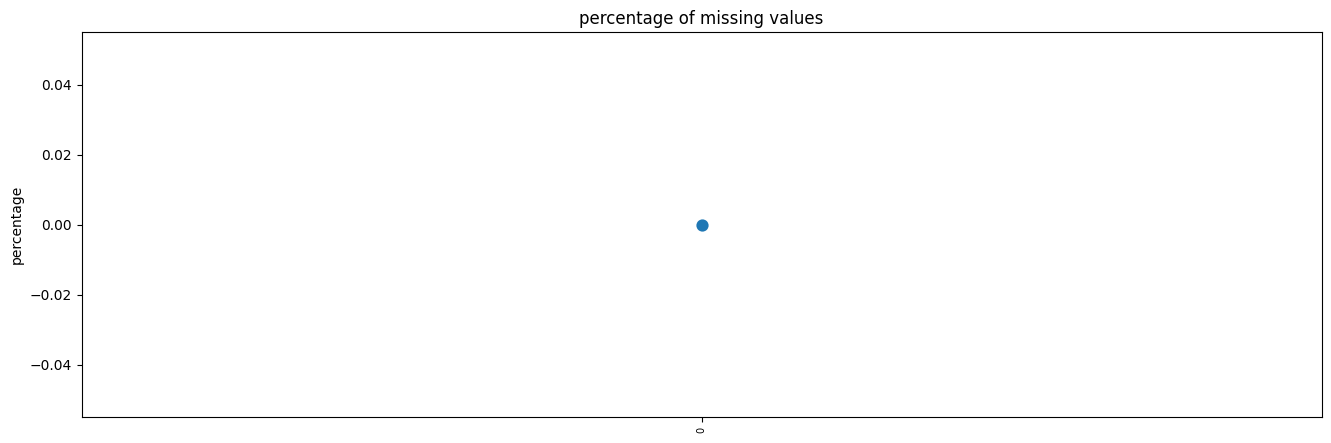

In [14]:
missing =pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax=sns.pointplot(data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title("percentage of missing values")
plt.ylabel("percentage")
plt.show()

#Missing Data- Initial Intution
-here we dont have any missing data
General Thumb Rules:
    - For features with less missing values - can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
    -  For features with very high number of missing values- its better to drop those columns as they give very less insights on analysis.
    - so decision we have to take carefully, by considering every other column & its relationsheep.
    

In [15]:
telco_data=df.copy()
telco_data.TotalCharges=pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
telco_data.loc[telco_data['TotalCharges'].isnull()==True]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753           Yes                No              No  No internet service   
936           Yes                No             DSL                  Yes   
1082          Yes               Yes              No  No internet service   
1340           No  No phone service             DSL                  Yes   
3331          Yes                No              No  No internet service   
3826          Yes               Yes              No  No internet service   
4380          Yes                No              No  No internet service   
5218          Yes                No              No  No internet service   
6670          Yes               Yes             DSL                   No   
6754          Yes               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85       

#Miising value treatment
#since the % of therese records compared to total dataset is very low i.e 0.15%. its better to ignore them


In [17]:
#removing the missing value
telco_data.dropna(how='any',inplace=True)

In [18]:
print(telco_data['tenure'].max())

72


In [19]:
#Group the tenure in bins of 12 months
labels=["{0}-{1}".format(i,i+11) for i in range(1,72,12)]
telco_data['tenure_group']=pd.cut(telco_data.tenure,range(1,80,12),right=False, labels=labels)

In [20]:
telco_data['tenure_group'].value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

In [21]:
#drop  column customerid & tenure
telco_data.drop(columns=['customerID','tenure'],axis=1,inplace =True)
telco_data.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges Churn tenure_group  
0           Electronic check           29.85         29.85    No         1-12  
1               Mailed check           56.95       1889.50    No        25-36  
2               Mailed check           53.85        108.15   Yes         1-12  
3  Bank transfer (automatic)           42.30       1840.75    No        37-48  
4           Electronic check           70.70        151.65   Yes         1-12

# Data Exploration

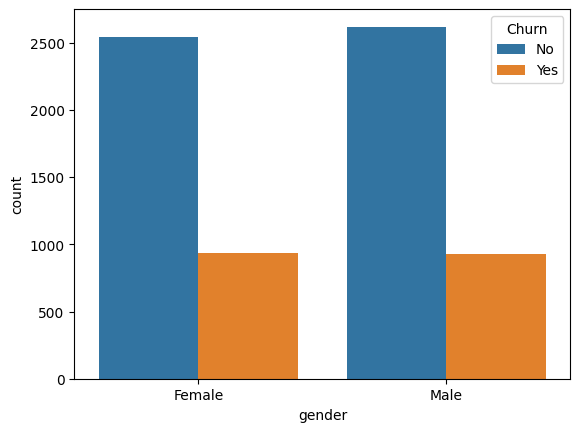

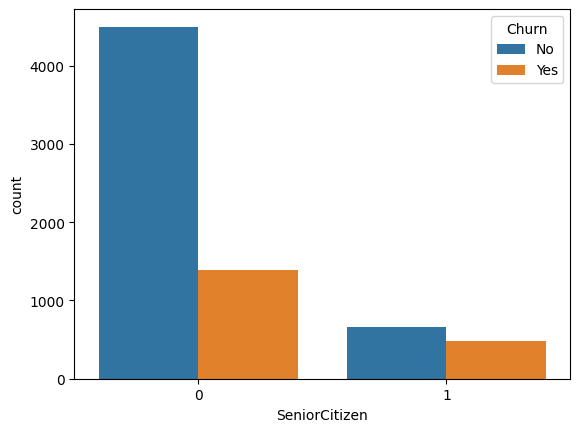

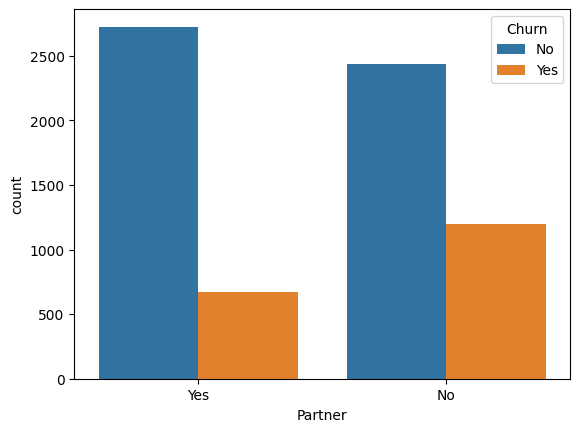

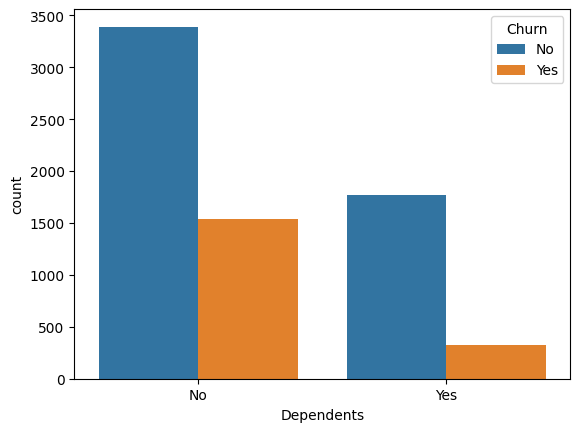

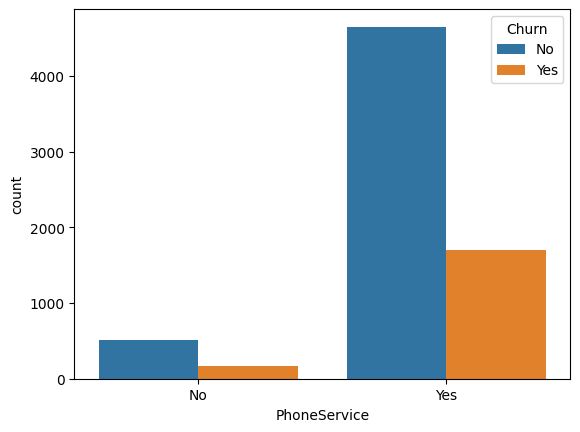

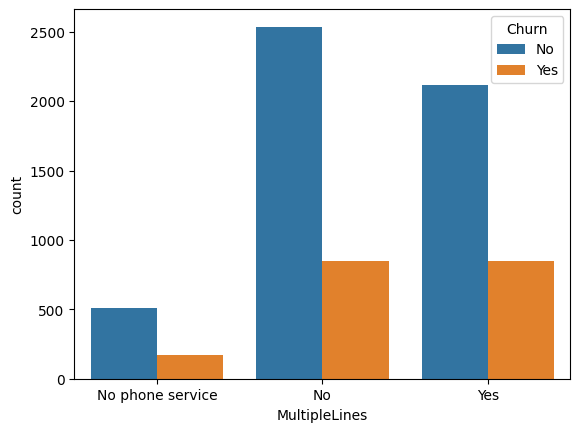

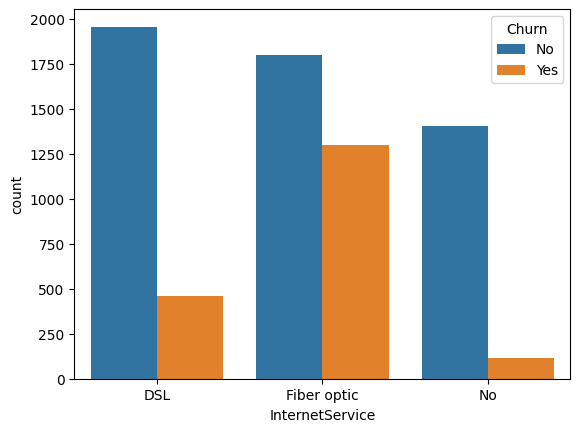

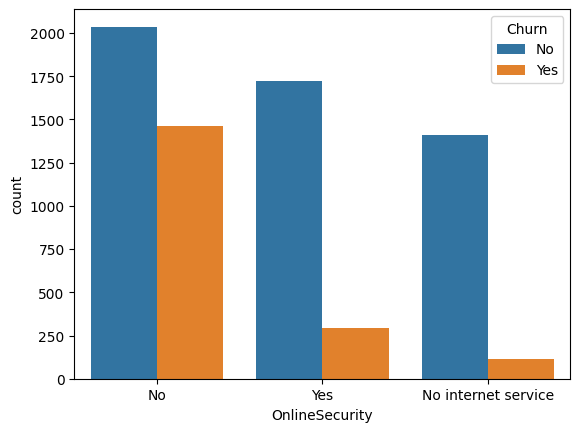

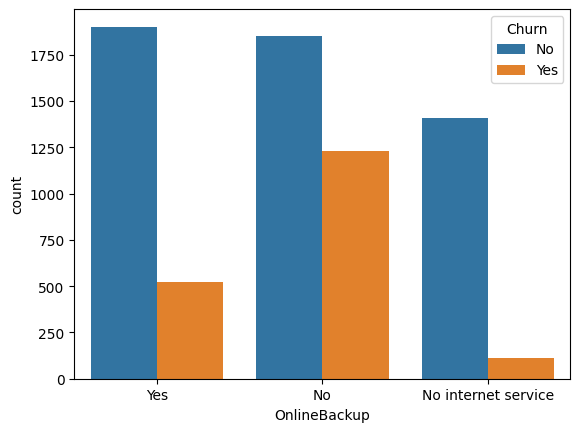

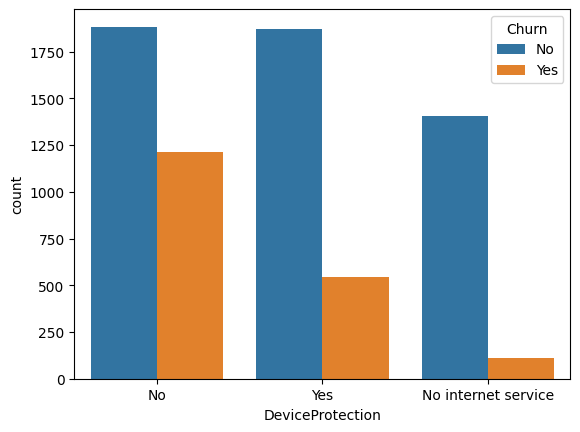

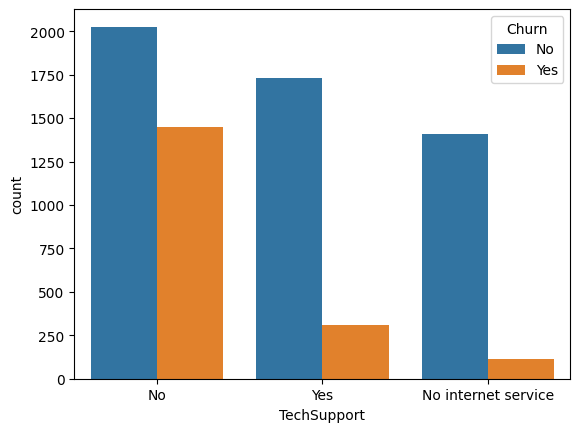

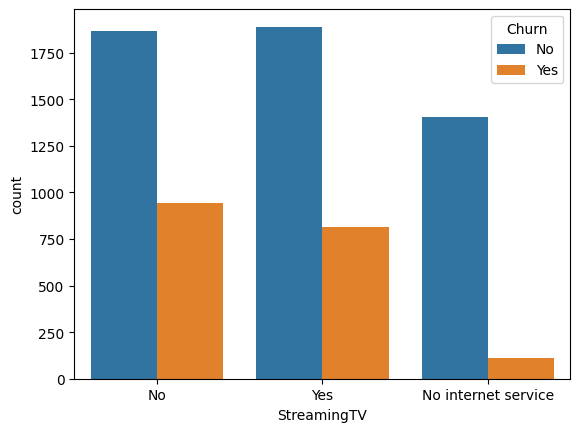

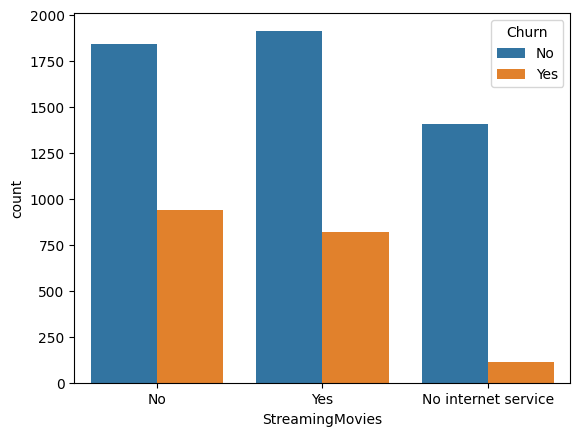

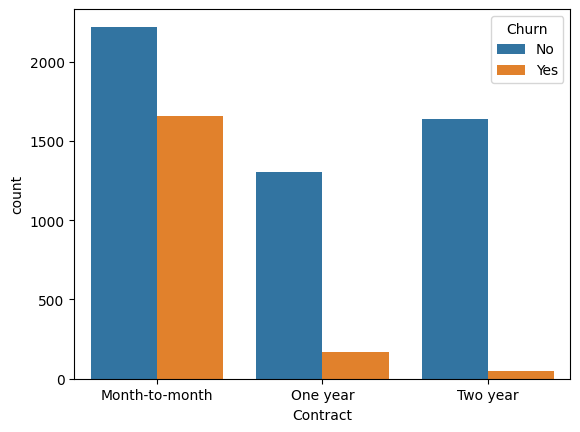

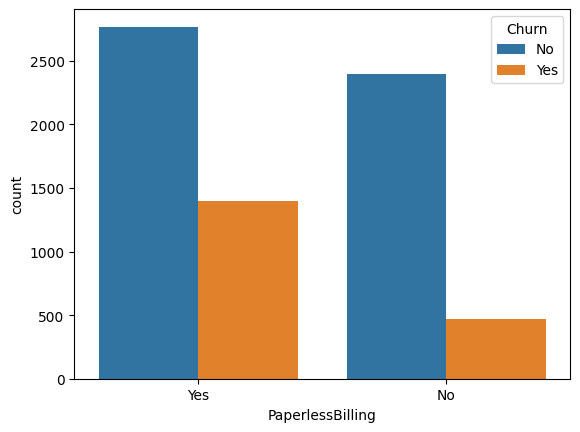

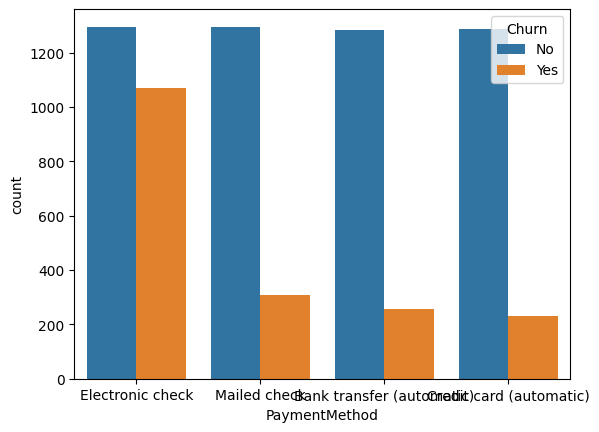

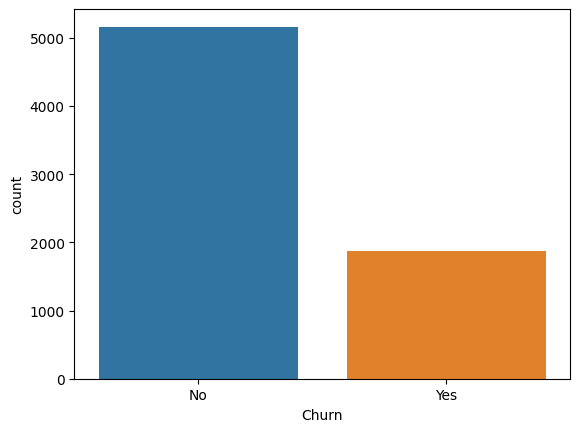

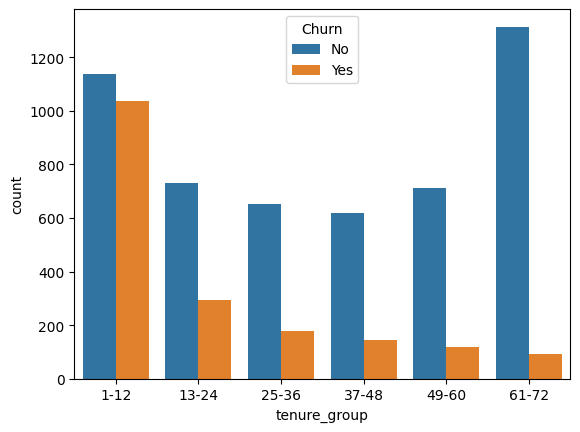

In [22]:
#Univariate Analysis
for i, predictor in enumerate(telco_data.drop(columns=['TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data,x=predictor, hue='Churn')

In [23]:
telco_data

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0     Female              0     Yes         No           No  No phone service   
1       Male              0      No         No          Yes                No   
2       Male              0      No         No          Yes                No   
3       Male              0      No         No           No  No phone service   
4     Female              0      No         No          Yes                No   
...      ...            ...     ...        ...          ...               ...   
7038    Male              0     Yes        Yes          Yes               Yes   
7039  Female              0     Yes        Yes          Yes               Yes   
7040  Female              0     Yes        Yes           No  No phone service   
7041    Male              1     Yes         No          Yes               Yes   
7042    Male              0      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  \
0              Electronic check           29.85         29.85    No   
1                  Mailed check           56.95       1889.50    No   
2                  Mailed check           53.85        108.15   Yes   
3     Bank transfer (automatic)           42.30       1840.75    No   
4              Electronic check           70.70        151.65   Yes   
...                         ...             ...           ...   ...   
7038               Mailed check           84.80       1990.50    No   
7039    Credit card (automatic)          103.20       7362.90    No   
7040           Electronic check           29.60        346.45    No   
7041               Mailed check           74.40        306.60   Yes   
7042  Bank transfer (automatic)          105.65       6844.50    No   

     tenure_group  
0            1-12  
1           25-36  
2            1-12  
3           37-48  
4            1-12  
...           ...  
7038        13-24  
7039        61-72  
7040         1-12  
7041         1-12  
7042        61-72  

[7032 rows x 20 columns]

In [24]:
#One hot encoding
columns_to_encode = telco_data.columns.difference(['Churn'])
telco_data_dummies = pd.get_dummies(telco_data, columns=columns_to_encode, drop_first=True)
telco_data_dummies.head()

Churn  Contract_One year  Contract_Two year  Dependents_Yes  \
0    No                  0                  0               0   
1    No                  1                  0               0   
2   Yes                  0                  0               0   
3    No                  1                  0               0   
4   Yes                  0                  0               0   

   DeviceProtection_No internet service  DeviceProtection_Yes  \
0                                     0                     0   
1                                     0                     1   
2                                     0                     0   
3                                     0                     1   
4                                     0                     0   

   InternetService_Fiber optic  InternetService_No  MonthlyCharges_18.4  \
0                            0                   0                    0   
1                            0                   0                    0   
2                            0                   0                    0   
3                            0                   0                    0   
4                            1                   0                    0   

   MonthlyCharges_18.55  MonthlyCharges_18.7  MonthlyCharges_18.75  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   MonthlyCharges_18.8  MonthlyCharges_18.85  MonthlyCharges_18.9  \
0                    0                     0                    0   
1                    0                     0                    0   
2                    0                     0                    0   
3                    0                     0                    0   
4                    0                     0                    0   

   MonthlyCharges_18.95  MonthlyCharges_19.0  MonthlyCharges_19.05  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   MonthlyCharges_19.1  MonthlyCharges_19.15  MonthlyCharges_19.2  \
0                    0                     0                    0   
1                    0                     0                    0   
2                    0                     0                    0   
3                    0                     0                    0   
4                    0                     0                    0   

   MonthlyCharges_19.25  MonthlyCharges_19.3  MonthlyCharges_19.35  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   MonthlyCharges_19.4  MonthlyCharges_19.45  MonthlyCharges_19.5  \
0                    0                     0                    0   
1                    0                     0                    0   
2                    0                     0                    0   
3                    0                     0                    0   
4                    0                     0                    0   

   MonthlyCharges_19.55  MonthlyCharges_19.6  MonthlyCharges_19.65  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0       

In [25]:
telco_data_dummies['Churn']=telco_data_dummies['Churn'].map({'Yes':1,'No':0})

In [26]:
telco_data_dummies.head()

Churn  Contract_One year  Contract_Two year  Dependents_Yes  \
0      0                  0                  0               0   
1      0                  1                  0               0   
2      1                  0                  0               0   
3      0                  1                  0               0   
4      1                  0                  0               0   

   DeviceProtection_No internet service  DeviceProtection_Yes  \
0                                     0                     0   
1                                     0                     1   
2                                     0                     0   
3                                     0                     1   
4                                     0                     0   

   InternetService_Fiber optic  InternetService_No  MonthlyCharges_18.4  \
0                            0                   0                    0   
1                            0                   0                    0   
2                            0                   0                    0   
3                            0                   0                    0   
4                            1                   0                    0   

   MonthlyCharges_18.55  MonthlyCharges_18.7  MonthlyCharges_18.75  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   MonthlyCharges_18.8  MonthlyCharges_18.85  MonthlyCharges_18.9  \
0                    0                     0                    0   
1                    0                     0                    0   
2                    0                     0                    0   
3                    0                     0                    0   
4                    0                     0                    0   

   MonthlyCharges_18.95  MonthlyCharges_19.0  MonthlyCharges_19.05  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   MonthlyCharges_19.1  MonthlyCharges_19.15  MonthlyCharges_19.2  \
0                    0                     0                    0   
1                    0                     0                    0   
2                    0                     0                    0   
3                    0                     0                    0   
4                    0                     0                    0   

   MonthlyCharges_19.25  MonthlyCharges_19.3  MonthlyCharges_19.35  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   MonthlyCharges_19.4  MonthlyCharges_19.45  MonthlyCharges_19.5  \
0                    0                     0                    0   
1                    0                     0                    0   
2                    0                     0                    0   
3                    0                     0                    0   
4                    0                     0                    0   

   MonthlyCharges_19.55  MonthlyCharges_19.6  MonthlyCharges_19.65  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0  

In [27]:
telco_data_dummies.to_csv('tel_churn1.csv')

In [28]:
#Relationship between monthly charges & Total charges

In [29]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges',y='TotalCharges',fit_reg=False)

KeyError: "None of [Index(['MonthlyCharges', 'TotalCharges'], dtype='object')] are in the [columns]"

In [ ]:
#Total charges increase as monthly charges increase -as expected

In [ ]:
sns.heatmap(telco_data_dummies.corr(),cmap="Paired")

# Bivariate Analysis

In [ ]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]


In [ ]:
def uniplot(df,col,title,hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"]=20
    plt.rcParams["axes.titlesize"]=22
    plt.rcParams["axes.titlepad"]=30
    
    temp=pd.Series(data=hue)
    fig,ax=plt.subplots()
    width=len(df[col].unique())+7 +4*len(temp.unique())
    fig.set_size_inches(width,8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    
    ax=sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue,palette='bright')
    
    plt.show()
    
    

In [ ]:
uniplot(new_df1_target1,col='Partner',title='Distribution of gender for churned customers',hue='gender')

In [ ]:
uniplot(new_df1_target0,col='Partner',title='Distribution of gender for churned customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of gender for churned customers',hue='gender')

#conclusion
1.Electronic check medium are highest churners
2.Contract type - monthly customers are more likely to churn because of no contract terms,as they are free to go customers
3.No  online Security, No Tech Support category are high churners
4.Non senior citizen are high churners